In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_movies = pd.read_csv('tmdb_movies.csv')
df_genres = pd.read_csv('tmdb_genres.csv')

In [2]:
df_movies.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [3]:
df_genres.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [4]:
df_genres.rename({'Unnamed: 0': 'genre_id'}, axis='columns', inplace=True)
df_genres.head()

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [5]:
quartile3 = df_movies.vote_count.quantile(0.75)

**1** Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [6]:
df_movies[df_movies.vote_count > quartile3 ].sort_values(by="vote_average", ascending=False).head(10).reset_index()[["original_title","vote_average"]]

,original_title,vote_average
0,The Shawshank Redemption,8.5
1,The Godfather,8.4
2,千と千尋の神隠し,8.3
3,Whiplash,8.3
4,The Godfather: Part II,8.3
5,Pulp Fiction,8.3
6,Schindler's List,8.3
7,Fight Club,8.3
8,Psycho,8.2
9,GoodFellas,8.2


**2** Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (
revenue
) oraz średni budżet (
budget
) w danym roku dla fi lmów opublikowanych od 2010(włącznie) do 2016 roku (włącznie).

In [7]:
import datetime
import math
df_movies.release_date = df_movies.release_date.apply(lambda x : pd.to_datetime(x)).dt.year
df_means = df_movies[(df_movies.release_date >= 2010) & (df_movies.release_date <= 2016) ].groupby(df_movies.release_date)[['revenue','budget']].mean().astype(np.int64)
df_means.reset_index(inplace=True)
df_means['release_date_int']= df_means['release_date'].apply(lambda x : str(math.ceil(x)).replace('.0','') )
df_means[['release_date_int','revenue','budget']]

,release_date_int,revenue,budget
0,2010,90438110,34495410
1,2011,92004130,34772320
2,2012,116065914,34922031
3,2013,101348455,35523293
4,2014,101346599,30959887
5,2015,105439926,31132163
6,2016,139049586,45703269


Następnie na tej podstawie stwórz wykres, wktórym średnie przychody są wykresem kolumnowym, a średni budżet wykresemliniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodajtytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, leczpoza obszarem osi.

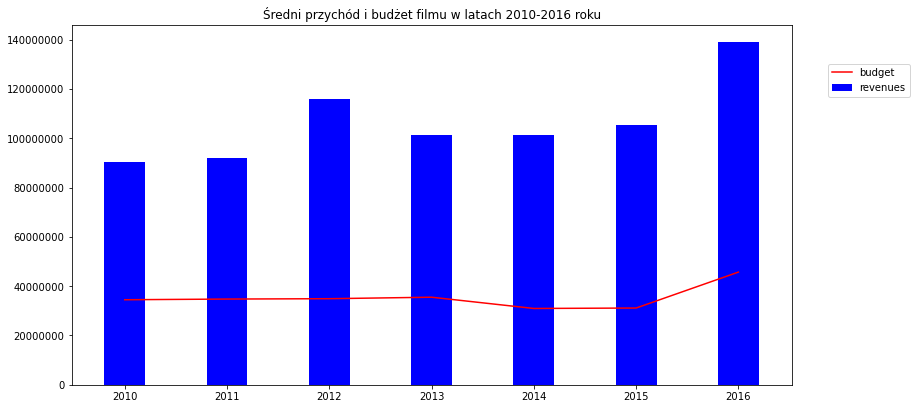

In [8]:
fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0,0,1,1])
 
df2 = df_means.reset_index()
revenues = df2['revenue']
budgets = df2['budget']
years = df2['release_date']

axes.ticklabel_format(useOffset=False, style='plain')

plt.bar(years, revenues, color ='blue', width = 0.4, label='revenues')
plt.plot(years,budgets, color='red', label='budget')
 
axes.legend(loc=(1.05,0.8))
plt.title("Średni przychód i budżet filmu w latach 2010-2016 roku")
plt.show()

Baza filmów zawiera kolumnę z id gatunku ( genre_id). Na tej podstawie połączze sobą bazę fi lmów z bazą gatunków, tak aby w bazie fi lmów można byłoodczytać nazwę gatunku fi lmu

In [9]:
df_movies_genres = pd.merge(df_movies, df_genres, how="left", on="genre_id")
df_movies_genres.head(5)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009.0,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007.0,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015.0,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012.0,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012.0,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action


Jaki gatunek fi lmu z bazy pojawia się w niej najczęściej? Ile fi lmów tego gatunkuznajduje się w bazie?

In [10]:
df_movies_genres['genres'].value_counts() # Drama = 1207

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [11]:
df_movies_genres.groupby('genres').mean('runtime').sort_values('runtime', ascending=False)[['runtime']] #History

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


Stwórz histogram czasu trwania fi lmów z gatunku, który cechuje się największymśrednim czasem trwania.

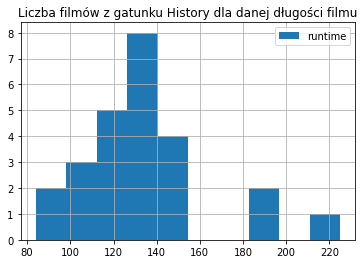

In [12]:
df_movies_genres[df_movies_genres['genres']=='History']['runtime'].hist(bins=10, legend=True)
plt.title("Liczba filmów z gatunku History dla danej długości filmu")
plt.show()